# Learning Objectives
- Evaluate performance of the selected model.
- Use k-fold cross validation to compare the performance of a pair of models.
-  Use repeated k-fold cross validation to compare the performance of a pair of models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('Secom.csv', low_memory=False)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Sensor 1 to Target
dtypes: float64(122), int64(1), object(468)
memory usage: 7.1+ MB
None


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,!,0.5005,0.0118,0.0035,2.363,!,!,!,!,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,!,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


Question 1.1: Detect and replace missing values in the data with np.nan . Hint: missing data is noted as !

In [2]:
df = df.replace(to_replace = '!', value = np.nan)

Question 1.2 Confirm that the change has worked

In [3]:
print(df[df == '!'].sum().sum())
print(df.isnull().sum().sum())

0.0
41951


Question 1.3: Fill the missing values with zeroes

In [4]:
df = df.fillna(0)

In [5]:
#Validate that the missing values were replaced
df.isna().sum().sum()

0

Question 2.1: Split the data into Training and testing. Make your test size = 0.2 and your random_state = 42.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Question 2.2: Fit a logistic regression model on the training data. Predict the test data and plot the ROC curve

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = clf.predict(X_test)

Plot ROC Curve

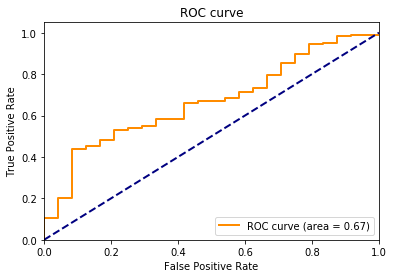

In [15]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

def plot_roc_curve(y_true, y_scores):
    
    fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=1)
    auc = roc_auc_score(y_true, y_scores)
    
    # Plot the ROC curve
    fig = plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend(loc="lower right")
    plt.show()
    return fig

# calculate the fpr and tpr for all thresholds of the classification
scores = clf.predict_proba(X_test)[:, 1]
roc_plot = plot_roc_curve(y_test, scores)

Question 2.2: Apply RFE with a logistic regression model on the training data testing out different number of features. Predict the test data and plot the ROC curve.

In [25]:
from sklearn.feature_selection import RFE

# hack to ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

regr = RFE(LogisticRegression(solver='lbfgs'), n_features_to_select=40, step=1)
regr.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=40, step=1, verbose=0)

In [26]:
y_pred = regr.predict(X_test)

Plot ROC Curve

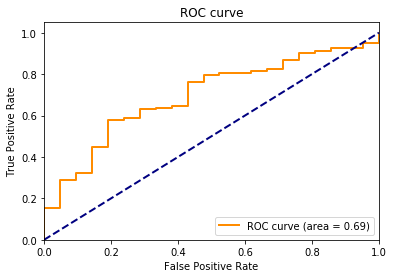

In [27]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# Plot the ROC curve
scores = regr.predict_proba(X_test)[:, 1]
roc_plot = plot_roc_curve(y_test, scores)

Question 3.1: Apply stratisfied tain test split to account for class imbalance

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

Question 3.2: Apply RFE with a logistic regression model on the stratisfied training data testing out different number of features. Predict the test data and plot the ROC curve.

In [29]:
strat = RFE(LogisticRegression(), n_features_to_select=40, step=1, verbose=1)
strat.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=40, step=1, verbose=0)

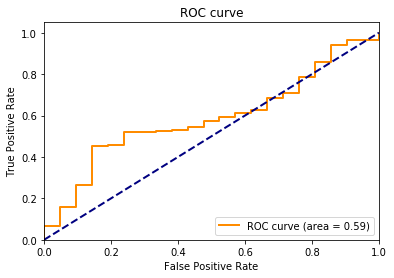

In [30]:
%matplotlib inline

# Plot the ROC curve
scores = strat.predict_proba(X_test)[:, 1]
roc_plot = plot_roc_curve(y_test, scores)

Question 4.1: Apply stratisfied K-Fold split where K=5 to the above data 

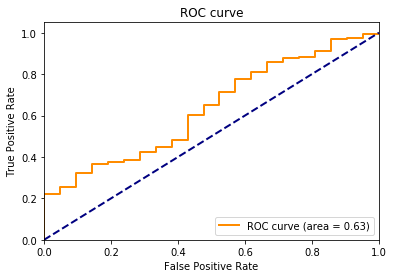

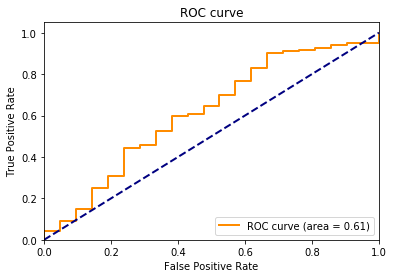

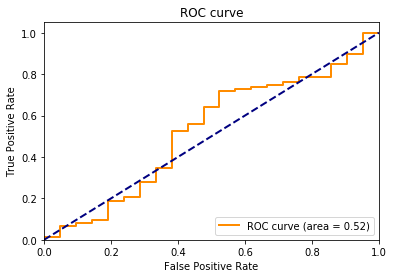

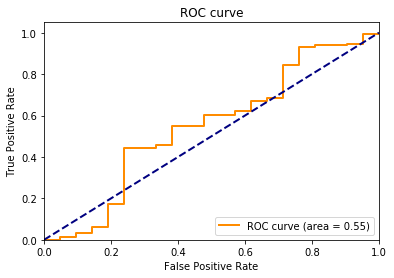

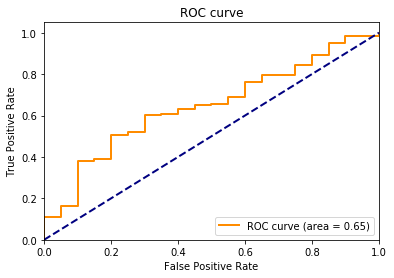

In [40]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    scores = clf.predict_proba(X_test)[:, 1]
    roc_plot = plot_roc_curve(y_test, scores)


Implement the model and then create the ROC Curve

Question 4.2: Summarize your findings of all above models

It's remarkable how much variation there was in the 5 folds of our K-fold cross validation. The AUC ranged from .52, barely better than the random guess line, to .65. This implies that there is a lot of variation in our training data; the success of our model is highly dependent on the precise train/test split that we come up with.

The best model was the first recursive feature elimination model that we trained, with an AUC score of .69. In a real application, I might combine the RFE and K-Fold methods, to make sure that the success of the RFE method wasn't due in part to random chance related to its train/test split. 

<h3> Question 5. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

Going into this assignment, I had a lot of experience with K-fold cross validation, which I have used regularly for my dissertation. However, I hadn't used recursive feature elimination before this assignment. In this regard, it was a very informative experience. It was useful to see first-hand how much compute time you are adding by doing RFE. In our case, with a full model of 591 features, RFE has to train (591 - n_features_to_select) models, which obviously slows down the whole process. The problem would only get compounded if we tried doing K-fold cross validation alongside our RFE. 